# Train your first neural network: basic classification

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 9s 2us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape,len(train_labels),train_labels,test_images.shape,len(test_labels)

((60000, 28, 28),
 60000,
 array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 (10000, 28, 28),
 10000)

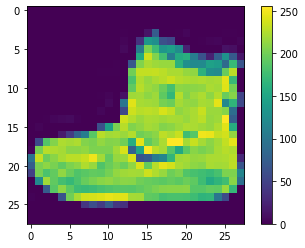

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

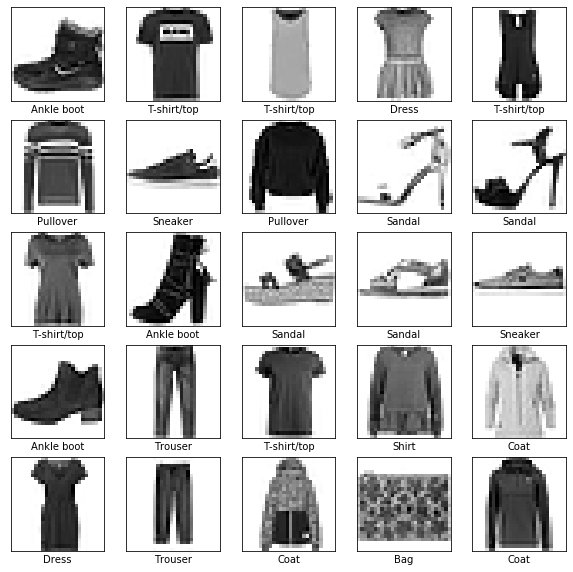

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4979 - accuracy: 0.8261
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3735 - accuracy: 0.8641
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3360 - accuracy: 0.8775
Epoch 4/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3147 - accuracy: 0.8839
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2975 - accuracy: 0.8902
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2816 - accuracy: 0.8950
Epoch 7/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2704 - accuracy: 0.9002
Epoch 8/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2599 - accuracy: 0.9036
Epoch 9/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2495 - accuracy: 0.9073
Epoch 10/10
60

In [13]:
test_images.shape,test_labels.shape

((10000, 28, 28), (10000,))

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels,batch_size=1000,verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.3196 - accuracy: 0.8854

Test accuracy: 0.8854


In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([1.3364863e-06, 2.9293010e-09, 6.3923635e-09, 3.6196504e-11,
       6.2876232e-08, 5.9217781e-02, 2.5867998e-06, 3.0458298e-02,
       1.9931589e-07, 9.1031969e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

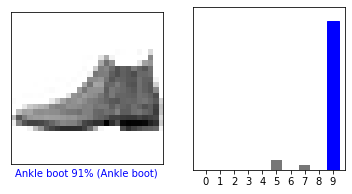

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

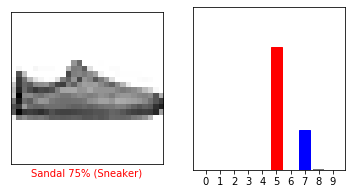

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

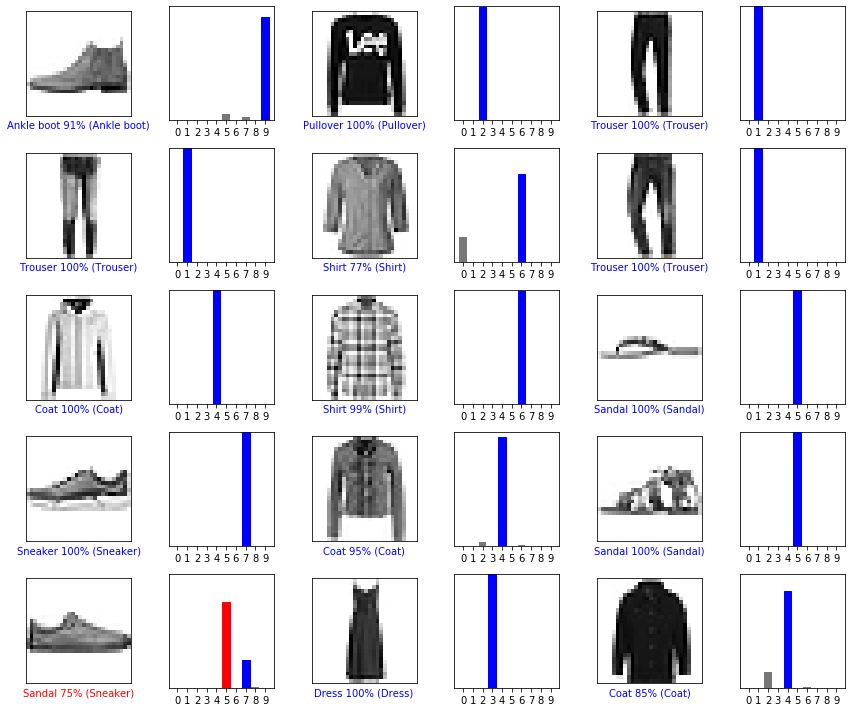

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.4944140e-06 2.9776418e-12 9.9770701e-01 2.1883237e-14 1.9731976e-03
  5.1589923e-13 3.1143290e-04 1.6045650e-13 1.0453723e-08 4.0248070e-13]]


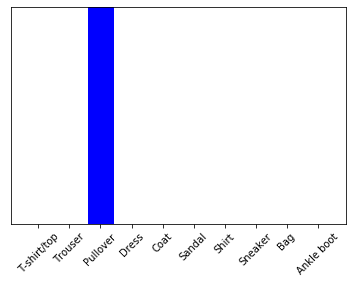

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [29]:
np.argmax(predictions_single[0])

2